#**0 | IMPORTS**

* **GOOGLE COLAB**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* **LIBRARIES & PACKAGES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold

* **CLUSTERING**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* **DATASET**

In [ ]:
path = ''

In [ ]:
#selected the yearly database, once it has been processed
df = pd.read_csv(path)

In [5]:
df.head()

,country,TARIC,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%,diff_EUR,diff_TON,diff_EUR_KG,diff_population,diff_pop_over_14,diff_gdp_capita,diff_hdi,diff_l_alc,diff_euro_person,diff_litre_person,diff_gdp_sw_%
0,Albania,Cava,Balkan Europe,None / Other,14.375,4.000,4.3615,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.0060,0.0020,2.0,0.000059,12.945,3.660,0.1555,-8821.0,0.003065,2078.52,-0.0105,0.175,0.00500,0.00200,0.00005
1,Albania,Champagne,Balkan Europe,None / Other,1359.765,30.175,45.0085,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.5905,0.0130,2.0,0.005470,488.375,9.795,2.6085,-40200.0,0.004548,2742.17,-0.0125,0.292,0.21450,0.00433,0.00050
2,Albania,Prosecco,Balkan Europe,None / Other,524.400,109.344,4.8015,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.2280,0.0475,1.0,0.002129,314.417,63.561,0.1495,-40200.0,0.004548,2742.17,-0.0125,0.292,0.13733,0.02783,0.00094
3,Algeria,Cava,North Africa,GAFTA,0.000,0.000,NaN,46814308.0,0.689250,5579.1280,0.7490,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0000,0.0000,1.0,0.000000,-21.450,-3.660,NaN,2053209.0,-0.001580,1409.14,0.0190,0.000,-0.00100,0.00000,-0.00001
4,Algeria,Champagne,North Africa,GAFTA,43.970,1.865,23.4310,46489264.0,0.691430,5400.4705,0.7480,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0015,0.0000,1.0,0.000017,-191.307,-7.412,-1.8037,1729071.0,0.000097,1097.34,0.0090,0.000,-0.00583,0.00000,-0.00011


#**1 | DATA PREPROCESSING**

##**1.1 | PIVOT TABLE** - WINES

* **PIVOT**

In [52]:
df_pivot = df.pivot_table(index='country',
                       columns='TARIC',
                       values=['EUR', 'TON', 'EUR_KG','euro_person','litre_person','distance','gdp_sw_%','diff_EUR','diff_TON','diff_EUR_KG','diff_euro_person','diff_litre_person','diff_gdp_sw_%'],
                       aggfunc='sum')

df_pivot.columns = ['_'.join(col).lower() for col in df_pivot.columns]

In [53]:
df_pivot.head(3)

,eur_cava,eur_champagne,eur_prosecco,eur_kg_cava,eur_kg_champagne,eur_kg_prosecco,ton_cava,ton_champagne,ton_prosecco,diff_eur_cava,diff_eur_champagne,diff_eur_prosecco,diff_eur_kg_cava,diff_eur_kg_champagne,diff_eur_kg_prosecco,diff_ton_cava,diff_ton_champagne,diff_ton_prosecco,diff_euro_person_cava,diff_euro_person_champagne,diff_euro_person_prosecco,diff_gdp_sw_%_cava,diff_gdp_sw_%_champagne,diff_gdp_sw_%_prosecco,diff_litre_person_cava,diff_litre_person_champagne,diff_litre_person_prosecco,distance_cava,distance_champagne,distance_prosecco,euro_person_cava,euro_person_champagne,euro_person_prosecco,gdp_sw_%_cava,gdp_sw_%_champagne,gdp_sw_%_prosecco,litre_person_cava,litre_person_champagne,litre_person_prosecco
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,14.375,1359.765,524.400,4.3615,45.0085,4.8015,4.000,30.175,109.3440,12.945,488.375,314.417,0.1555,2.6085,0.1495,3.660,9.795,63.561,0.00500,0.21450,0.13733,0.00005,0.00050,0.00094,0.002,0.00433,0.02783,2.0,2.0,1.0,0.006,0.5905,0.2280,0.000059,0.005470,0.002129,0.002,0.0130,0.0475
Algeria,0.000,43.970,0.495,0.0000,23.4310,15.9245,0.000,1.865,0.0310,-21.450,-191.307,-6.475,0.0000,-1.8037,7.5218,-3.660,-7.412,-0.929,-0.00100,-0.00583,-0.00033,-0.00001,-0.00011,0.00000,0.000,0.00000,0.00000,1.0,1.0,1.0,0.000,0.0015,0.0000,0.000000,0.000017,0.000000,0.000,0.0000,0.0000
Andorra,767.095,2889.950,20.460,6.2410,38.2110,6.2890,123.081,75.855,3.2765,235.742,523.690,4.167,0.7557,5.4583,0.5573,27.024,3.705,0.422,2.95433,5.90483,0.04683,0.00442,0.00574,0.00004,0.316,0.00783,0.00350,0.0,0.0,0.0,10.715,40.4395,0.2855,0.021170,0.080123,0.000563,1.720,1.0615,0.0455


* **MERGE**

In [54]:
df_country = df.groupby('country')[['population','pop_over_14','gdp_capita','hdi','l_alc','Beer (%)','Wine (%)','Spirits (%)','Other (%)','gini','tariff','diff_population','diff_pop_over_14','diff_gdp_capita','diff_hdi','diff_l_alc']].median()

In [55]:
df_country.head()

,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,diff_population,diff_pop_over_14,diff_gdp_capita,diff_hdi,diff_l_alc
country,,,,,,,,,,,,,,,,
Albania,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.00,-40200.0,0.004548,2742.17,-0.012500,0.292
Algeria,46489264.0,0.691430,5400.4705,0.7480,0.600,53.5,32.7,13.8,0.1,27.6,30.00,1729071.0,0.000097,1097.34,0.009000,0.000
Andorra,81397.0,0.879680,44544.1230,0.9005,11.100,31.7,45.5,21.1,1.7,28.0,12.35,2914.0,0.010003,4490.92,0.036500,0.000
Angola,37317878.0,0.554495,2964.3620,0.5835,5.375,54.5,7.8,35.0,2.8,51.3,30.00,2778348.0,0.003452,161.03,-0.010500,0.042
Antigua and Barbuda,93544.0,0.819500,21051.6635,0.8215,9.175,26.3,32.8,37.6,3.3,44.0,5.00,1199.0,0.007907,4728.56,-0.004167,-1.125


In [56]:
df1 = df_pivot.join(df_country)

* **ADDING CATEGORICS**

In [57]:
df_country_cat = df.groupby('country')[['region', 'market_union']].first()

In [58]:
df1 = df1.join(df_country_cat)

In [59]:
df1.head()

,eur_cava,eur_champagne,eur_prosecco,eur_kg_cava,eur_kg_champagne,eur_kg_prosecco,ton_cava,ton_champagne,ton_prosecco,diff_eur_cava,diff_eur_champagne,diff_eur_prosecco,diff_eur_kg_cava,diff_eur_kg_champagne,diff_eur_kg_prosecco,diff_ton_cava,diff_ton_champagne,diff_ton_prosecco,diff_euro_person_cava,diff_euro_person_champagne,diff_euro_person_prosecco,diff_gdp_sw_%_cava,diff_gdp_sw_%_champagne,diff_gdp_sw_%_prosecco,diff_litre_person_cava,diff_litre_person_champagne,diff_litre_person_prosecco,distance_cava,distance_champagne,distance_prosecco,euro_person_cava,euro_person_champagne,euro_person_prosecco,gdp_sw_%_cava,gdp_sw_%_champagne,gdp_sw_%_prosecco,litre_person_cava,litre_person_champagne,litre_person_prosecco,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,diff_population,diff_pop_over_14,diff_gdp_capita,diff_hdi,diff_l_alc,region,market_union
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,14.375,1359.765,524.400,4.3615,45.0085,4.8015,4.000,30.1750,109.3440,12.945,488.375,314.417,0.1555,2.6085,0.1495,3.660,9.795,63.561,0.00500,0.21450,0.13733,0.00005,0.00050,0.00094,0.00200,0.00433,0.02783,2.0,2.0,1.0,0.0060,0.5905,0.2280,0.000059,0.005470,0.002129,0.002,0.0130,0.0475,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.00,-40200.0,0.004548,2742.17,-0.012500,0.292,Balkan Europe,None / Other
Algeria,0.000,43.970,0.495,0.0000,23.4310,15.9245,0.000,1.8650,0.0310,-21.450,-191.307,-6.475,0.0000,-1.8037,7.5218,-3.660,-7.412,-0.929,-0.00100,-0.00583,-0.00033,-0.00001,-0.00011,0.00000,0.00000,0.00000,0.00000,1.0,1.0,1.0,0.0000,0.0015,0.0000,0.000000,0.000017,0.000000,0.000,0.0000,0.0000,46489264.0,0.691430,5400.4705,0.7480,0.600,53.5,32.7,13.8,0.1,27.6,30.00,1729071.0,0.000097,1097.34,0.009000,0.000,North Africa,GAFTA
Andorra,767.095,2889.950,20.460,6.2410,38.2110,6.2890,123.081,75.8550,3.2765,235.742,523.690,4.167,0.7557,5.4583,0.5573,27.024,3.705,0.422,2.95433,5.90483,0.04683,0.00442,0.00574,0.00004,0.31600,0.00783,0.00350,0.0,0.0,0.0,10.7150,40.4395,0.2855,0.021170,0.080123,0.000563,1.720,1.0615,0.0455,81397.0,0.879680,44544.1230,0.9005,11.100,31.7,45.5,21.1,1.7,28.0,12.35,2914.0,0.010003,4490.92,0.036500,0.000,Mediterranean Europe,None / Other
Angola,10.600,1816.660,82.640,5.3375,37.4710,3.5310,2.015,54.0295,23.4220,-47.057,528.700,15.243,1.9455,1.7010,-0.6770,-12.396,17.390,6.496,-0.00250,0.02100,0.00067,-0.00003,0.00031,0.00002,-0.00067,0.00083,0.00000,4.0,4.0,4.0,0.0005,0.0880,0.0040,0.000010,0.001648,0.000074,0.000,0.0025,0.0010,37317878.0,0.554495,2964.3620,0.5835,5.375,54.5,7.8,35.0,2.8,51.3,30.00,2778348.0,0.003452,161.03,-0.010500,0.042,Sub-Saharan Africa,None / Other
Antigua and Barbuda,12.220,341.580,159.250,6.3100,36.5550,5.7155,2.175,9.3300,27.8590,5.510,38.720,39.397,0.5405,-0.0930,0.6352,0.835,0.950,3.995,0.07000,0.42767,0.48150,0.00019,-0.00192,0.00035,0.01000,0.01017,0.04583,4.0,4.0,4.0,0.1595,4.4540,2.0765,0.000610,0.017286,0.008063,0.028,0.1215,0.3635,93544.0,0.819500,21051.6635,0.8215,9.175,26.3,32.8,37.6,3.3,44.0,5.00,1199.0,0.007907,4728.56,-0.004167,-1.125,Central America and Caribbean,CARICOM


##**1.2 | NORMALIZE** - ONE HOT ENCODER

In [60]:
df2 = pd.get_dummies(df1, columns=['region', 'market_union'])

##**1.3 | CORRELATION ANALISIS**

* **FILLNA**

In [61]:
df2 = df2.fillna(0)

###**1.3.1 | CORRELATION ANALYSIS**

In [62]:
n_corr = df2.corr(numeric_only=True)
n_corr.style.background_gradient(cmap='coolwarm')

###**1.3.2 | HIGH CORRELATION & LOW VARIANCE**

* **HIGH CORRELATION**

In [63]:
df2_corr = pd.DataFrame(df2.corr(numeric_only=True))

vars_to_drop = set()

# 1. Eliminar columnas completamente NaN
for col in df2_corr.columns:
    if df2_corr[col].isna().all():
        vars_to_drop.add(col)

# 2. Eliminar una de cada par de variables altamente correlacionadas
high_corr_vars = set()

for col in df2_corr.columns:
    for row in df2_corr.index:
        if col != row and np.abs(df2_corr.loc[row, col]) > 0.95:
            # Guardar en orden alfabético para no duplicar pares
            pair = tuple(sorted((col, row)))
            high_corr_vars.add(pair)

# 3. Eliminar una de cada par (puedes cambiar la lógica si quieres otra forma de decidir)
for var1, var2 in high_corr_vars:
    # Simplemente eliminar uno, por ejemplo, el segundo alfabéticamente
    vars_to_drop.add(var2)

In [64]:
print(vars_to_drop)

{'eur_prosecco', 'ton_champagne', 'region_Southeast Asia', 'region_South America', 'litre_person_champagne', 'litre_person_prosecco', 'ton_cava', 'ton_prosecco', 'diff_litre_person_prosecco'}


* **LOW VARIANCE**

In [65]:
selector = VarianceThreshold(threshold=0.02)

# Fit + transform
df2_corr_var = selector.fit_transform(df2_corr)

# Recuperar las columnas seleccionadas
selected_features = df2_corr.columns[selector.get_support()]

# Crear nuevo DataFrame limpio
df2_clean = pd.DataFrame(df2_corr_var,
                        columns=selected_features,
                        index=df2_corr.index)

In [66]:
original_columns = set(df2_corr.columns)
final_columns = set(df2_clean.columns)

removed_features = original_columns - final_columns
print(removed_features)

{'diff_eur_kg_champagne', 'diff_eur_kg_cava', 'region_East Asia', 'region_North Africa', 'region_Eastern Europe', 'region_Central Europe', 'market_union_SACU', 'region_Balkan Europe', 'eur_kg_champagne', 'diff_hdi', 'tariff'}


###**1.3.3 | VARIABLE DROP**

In [67]:
drops = ['diff_hdi','diff_population','market_union_SACU']

In [68]:
df2 = df2.drop(columns=drops)

###**1.3.4 | SET INDEX**

##**1.4 | DATA STANDARIZATION**

* **SCALE** - StandardScaler()

In [69]:
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

#**2 | VARIABLE SELECTION - PCA**

In [70]:
pca = PCA(n_components=18)
df3 = pca.fit_transform(df3)

#**3 | CLUSTERING PROCESS**

##**3.1 | SELECT NUMBER OF CLUSTERS**

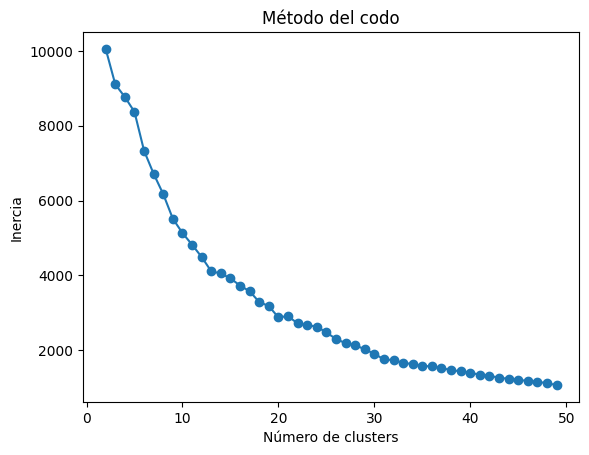

In [71]:
inertia = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 50), inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [72]:
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score = silhouette_score(df3, labels)
    print(f"k={k} → silhouette= {score:.3f}")

k=2 → silhouette= 0.506
k=3 → silhouette= 0.208
k=4 → silhouette= 0.124
k=5 → silhouette= 0.131
k=6 → silhouette= 0.150
k=7 → silhouette= 0.132
k=8 → silhouette= 0.147
k=9 → silhouette= 0.169
k=10 → silhouette= 0.201
k=11 → silhouette= 0.224
k=12 → silhouette= 0.249
k=13 → silhouette= 0.289
k=14 → silhouette= 0.217
k=15 → silhouette= 0.204
k=16 → silhouette= 0.217
k=17 → silhouette= 0.220
k=18 → silhouette= 0.251
k=19 → silhouette= 0.261


##**3.2 | ALGORYTHM & DATA MERGE**

In [73]:
kmeans = KMeans(n_clusters=12, random_state=0)
df2['cluster'] = kmeans.fit_predict(df3)

In [74]:
#country as column again
df4 = df2.reset_index()

#**4 | DATA VISUALIZATION**

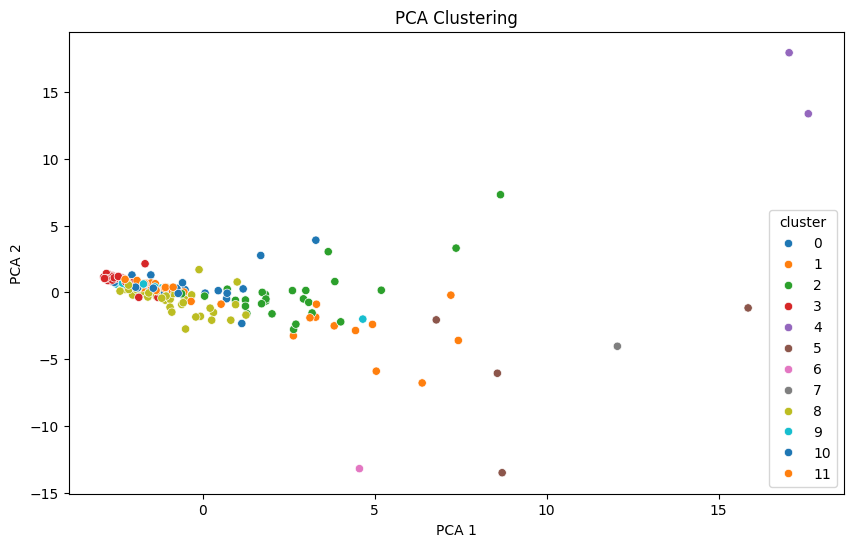

In [75]:
pca = PCA(n_components=2)
components = pca.fit_transform(df3)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0],
                y=components[:, 1],
                hue=df2['cluster'],
                palette='tab10')

plt.title("PCA Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#**5 | PICKLE**

In [ ]:
path_pickle = ''

In [ ]:
df4.to_csv(path_pickle, index=False)